# Assignment Linear Regression

## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
-  How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

### Importing all the relvant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
cars_price_df = pd.read_csv("./CarPrice_Assignment.csv")
cars_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Spliting the CarName column and correcting the names of CarBrand

In [4]:
split_car_name = cars_price_df['CarName'].str.split(" ", n =1, expand = True)

#Correcting the CarBrand Name
volks_list = ['vokswagen', 'vw']
toyota_list = ['toyouta']
mazda_list = ['maxda']
nissan_list = ['Nissan']
porsche_list = ['porcshce']
alfa_romeo_list = ['alfa-romero']
split_car_name[0] = split_car_name[0].replace(volks_list, 'volkswagen')
split_car_name[0] = split_car_name[0].replace(toyota_list, 'toyota')
split_car_name[0] = split_car_name[0].replace(mazda_list, 'mazda')
split_car_name[0] = split_car_name[0].replace(nissan_list, 'nissan')
split_car_name[0] = split_car_name[0].replace(porsche_list, 'porsche')
split_car_name[0] = split_car_name[0].replace(alfa_romeo_list, 'alfa-romeo')

#Renaming the column
split_car_name.rename(columns = {0:'CarBrand'}, inplace = True )

In [5]:
#Dropping the CarName column
cars_price_df = cars_price_df.drop(['CarName', 'car_ID'], axis = 1)

#Merging the DataFrames
final_coulmns = [split_car_name['CarBrand'], cars_price_df]
cars_final_df = pd.concat(final_coulmns, axis = 1)

#cars_final_df['drivewheel'] = cars_final_df['drivewheel'].replace('4wd', 'fwd')

cars_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
CarBrand            205 non-null object
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

## Visualising the Data

#### Plotting pairplots & heatmaps for columns with numeric data

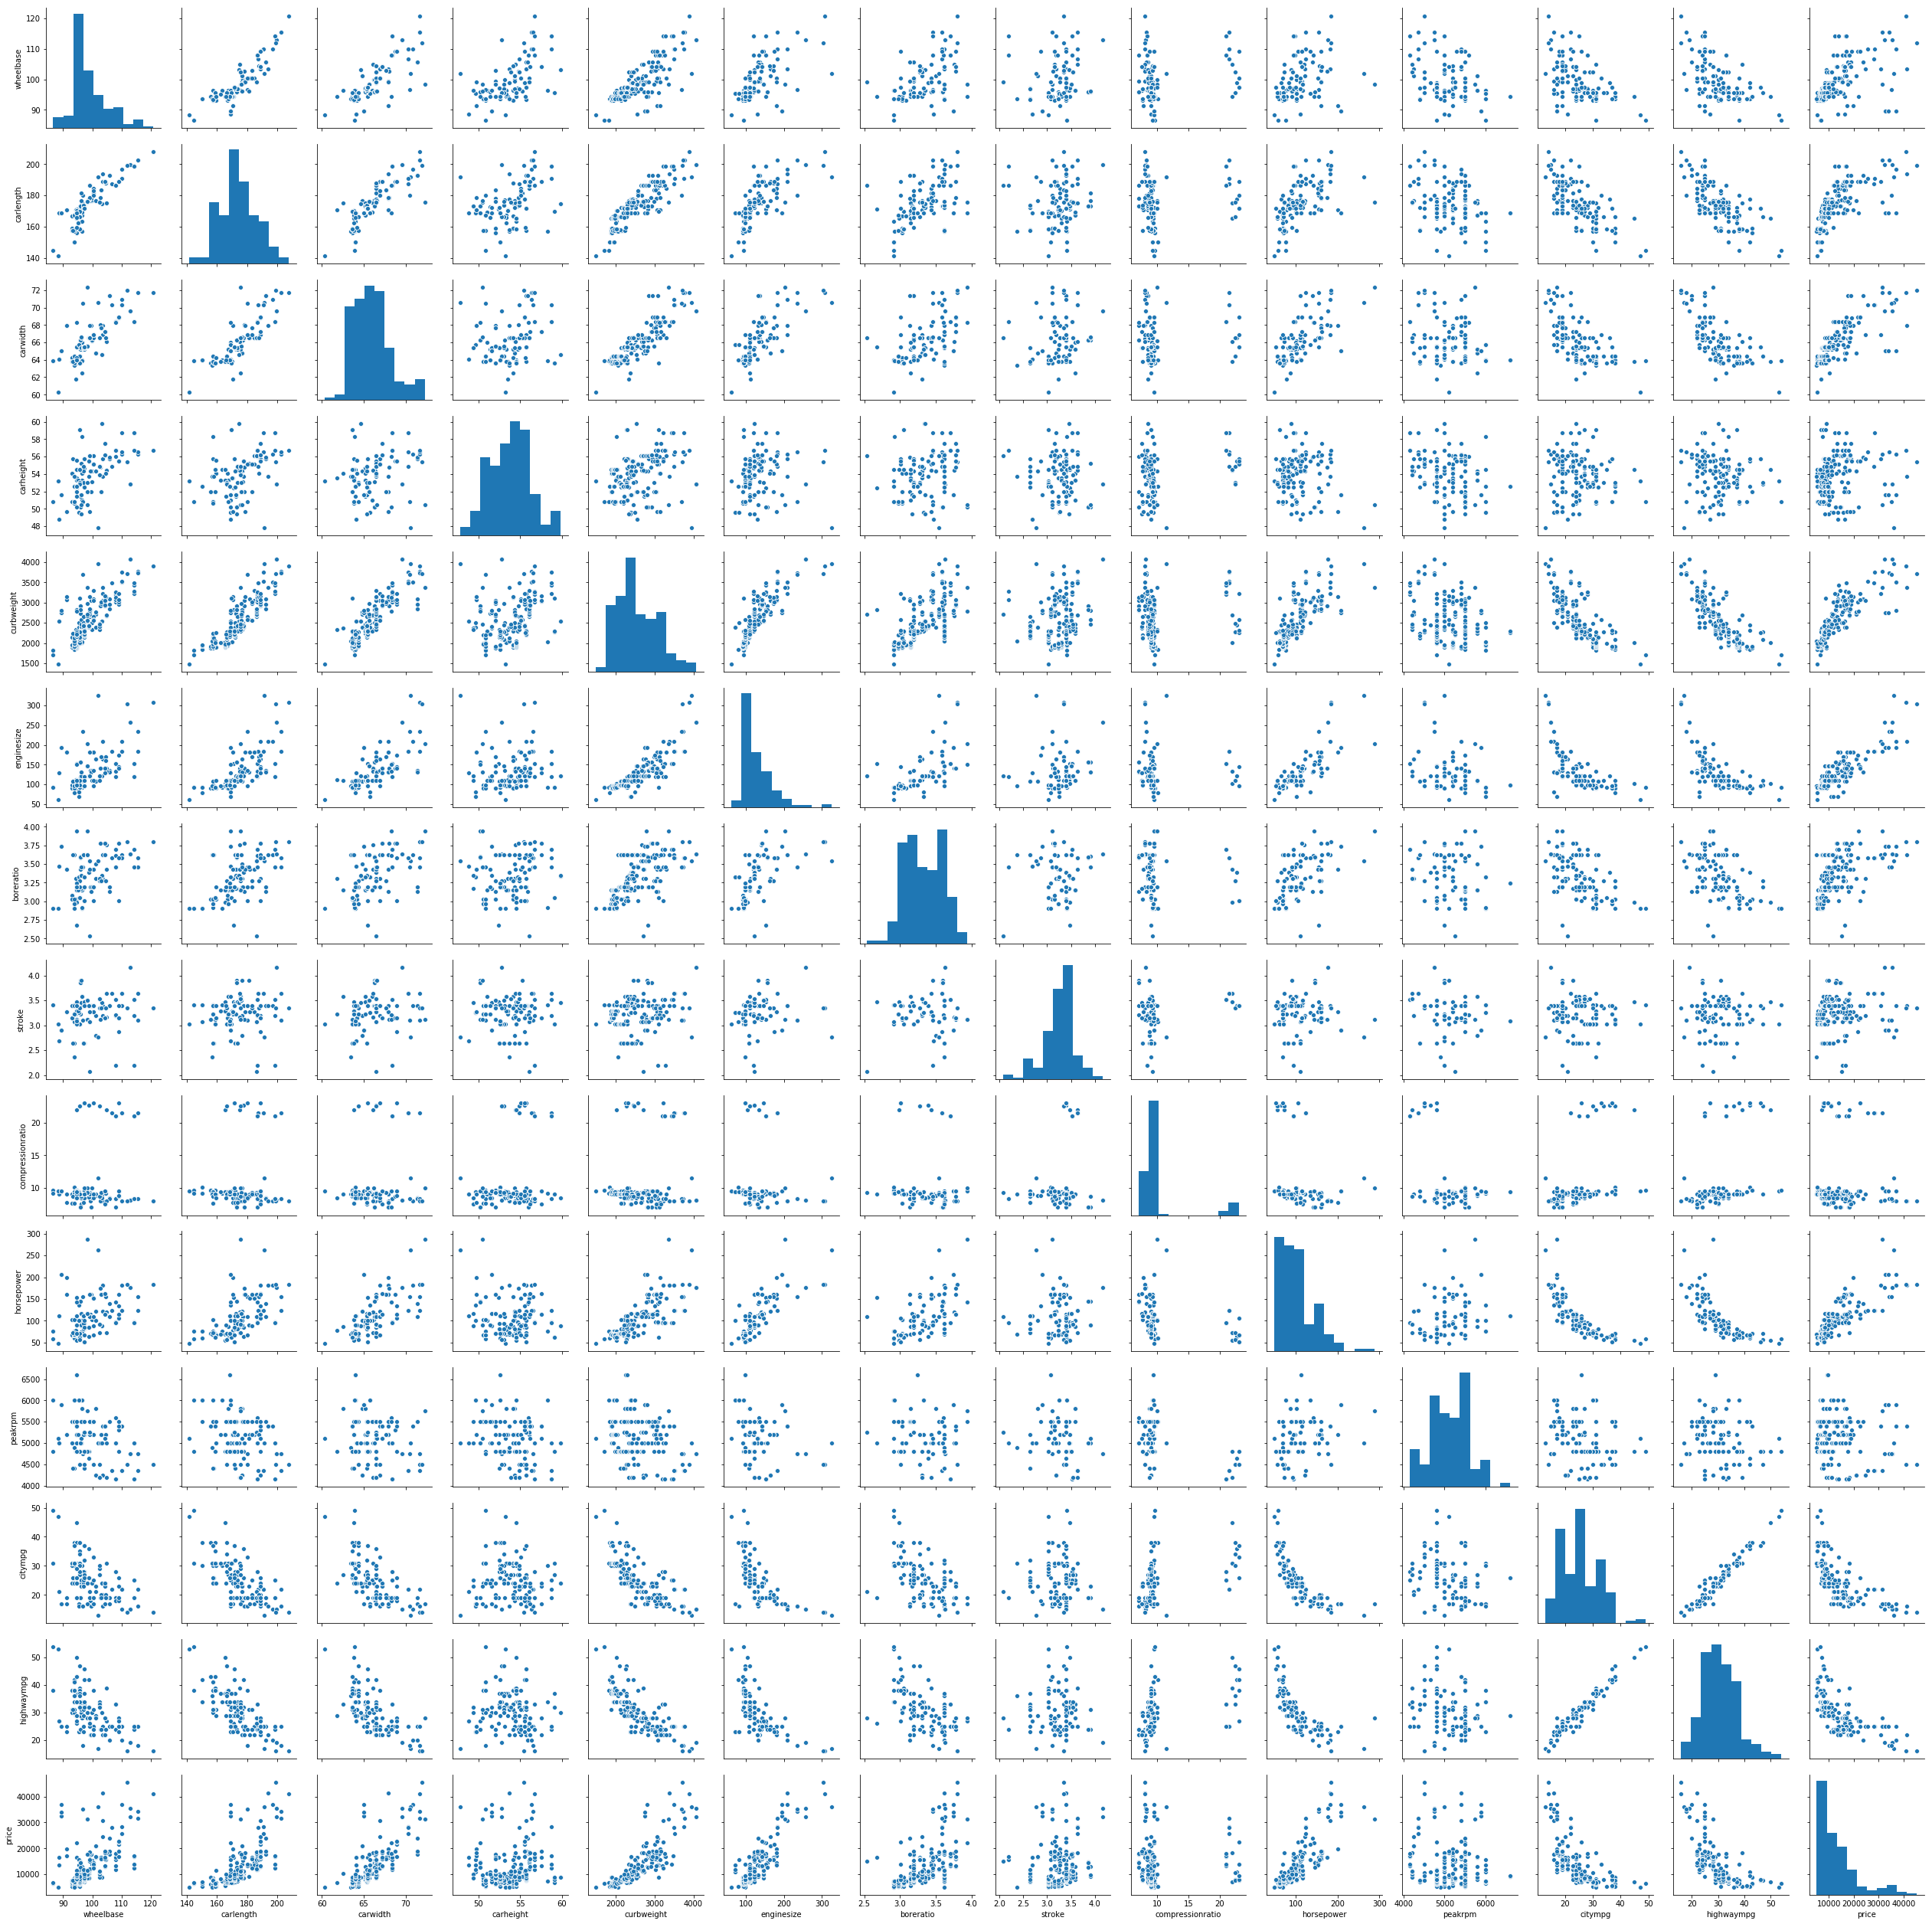

In [6]:
#Making a separate dataframe with only numeric columns
numeric_df_test = cars_final_df.select_dtypes(include=[np.number])
cols_to_drop = ['symboling']
numeric_df_test = numeric_df_test.drop(cols_to_drop, axis =1)

#Plotting a pairplot to visualise the data
sns.pairplot(numeric_df_test)
plt.show()

From the pairplot we can conclude below observations:
-  `citympg` & `highwaympg` are highly correlated and they almost form a straight line
- `curbweight`, `enignesize` & `horsepower` forms almost straight line with values with some outlier values.
- The car dimensions, `wheelbase`,`curbweight`, `carwidth` & `carlength` are highly negatively correlated with `citympg` & `highwaympg`. But are strongly related and almost froms a linear relationship.

#### Making separate pairplots

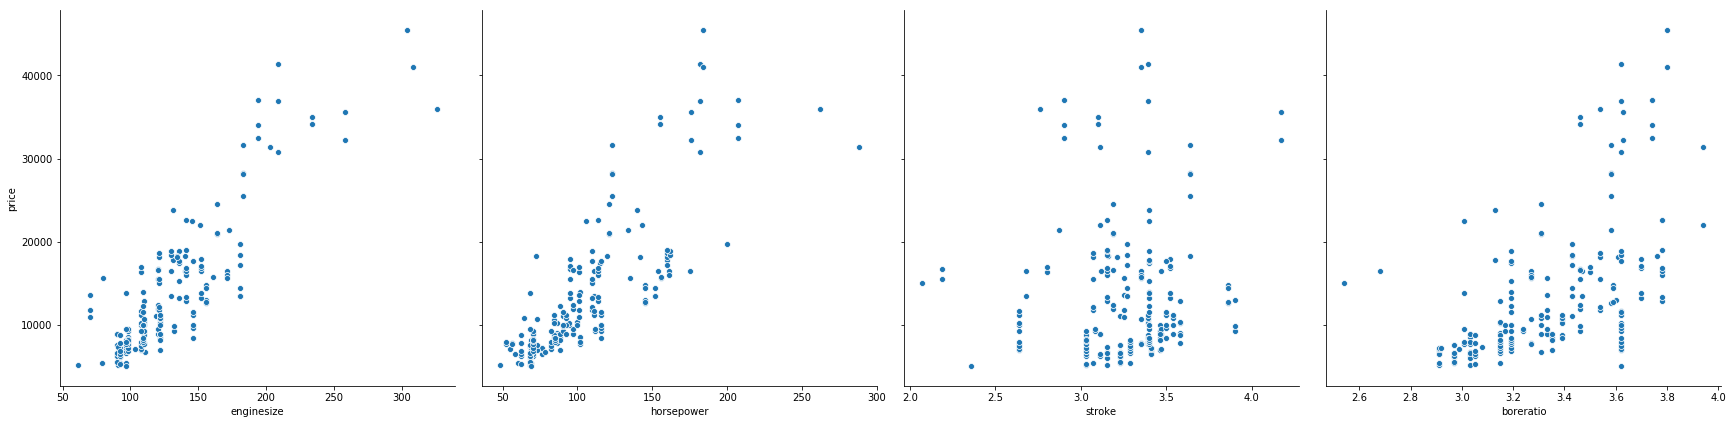

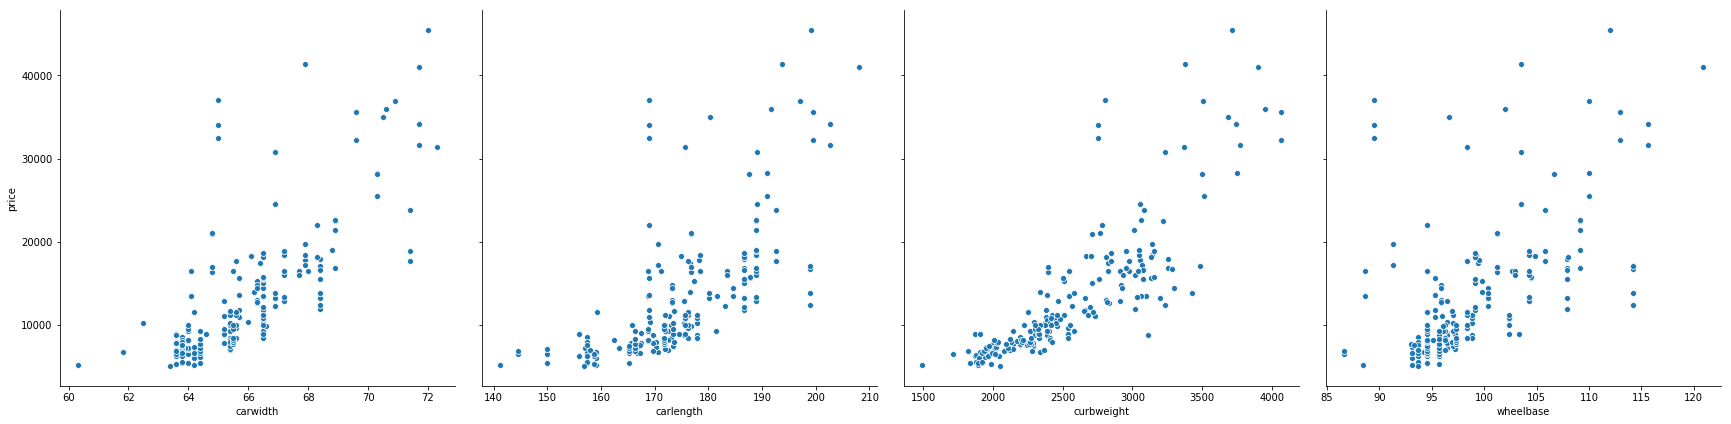

In [7]:
def PreparePairPlot(col_1, col_2, col_3, col_4):
    sns.pairplot(cars_final_df, x_vars=[col_1, col_2, col_3, col_4], y_vars='price',size=6, aspect=1, kind='scatter')
    plt.show()

#Prepairing plot against price with engine dimensions
PreparePairPlot('enginesize', 'horsepower', 'stroke', 'boreratio')

#Preparing plot against price with car dimensions
PreparePairPlot('carwidth', 'carlength', 'curbweight', 'wheelbase')

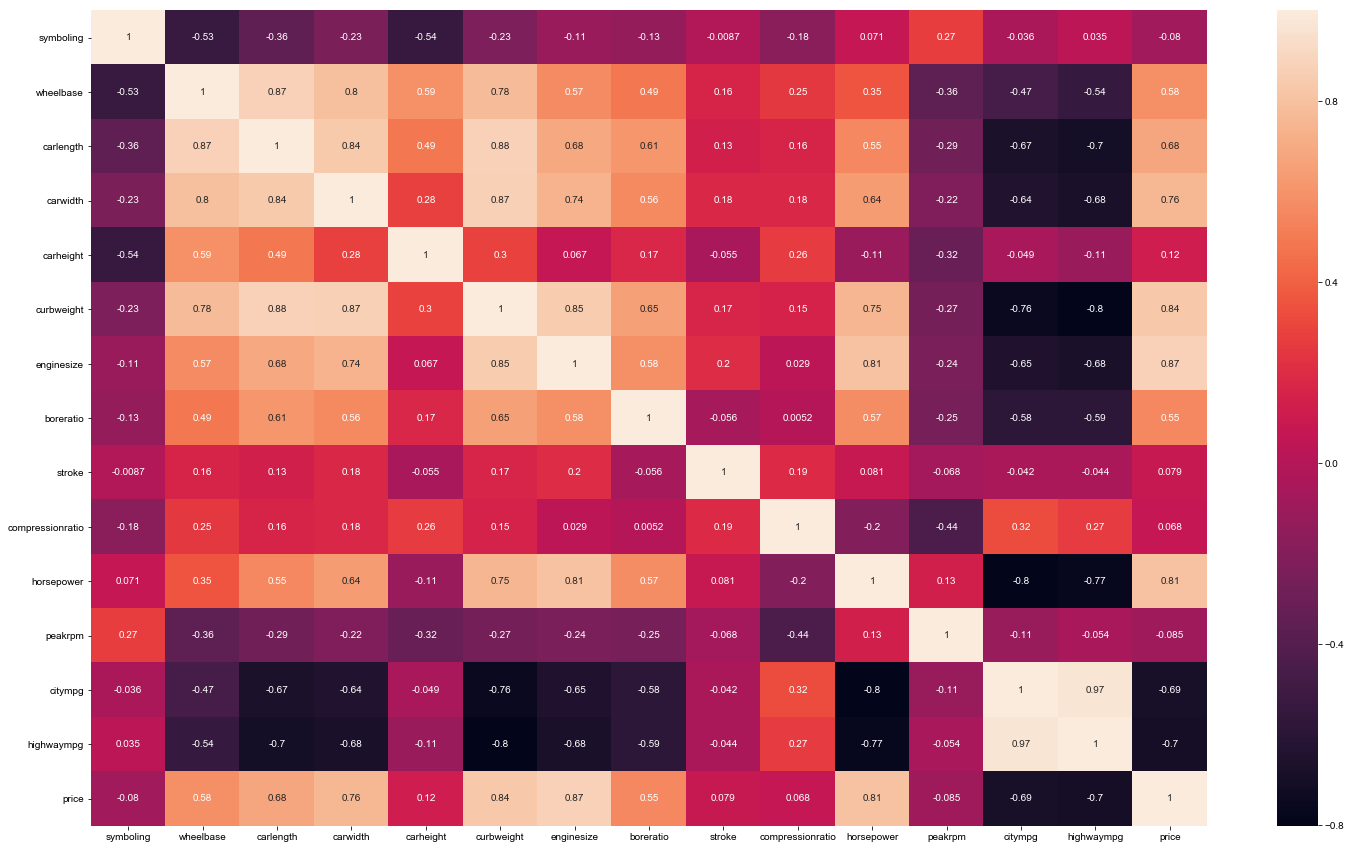

In [8]:
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(cars_final_df.corr(), annot = True, ax =ax)
sns.set(font_scale=2)
plt.show()

From the correlation graph we can conclude the following observation:
-  `citympg` & `highwaympg` are higly negatively correlated with `price`
- `curbweight`, `enginesize`, `horsepower`, `carwidth` & `carlength` are higly positively correlated with `price` 
- `citympg` & `highwaympg` are highly correlated
- The car dimensions, `wheelbase`,`curbweight`, `carwidth` & `carlength` are highly correlated amongst eachother.
- `horsepower` & `enginesize` are highly positively correlated.

#### Plotting distribution plot and box plot to check distribution of cars price and outliers.

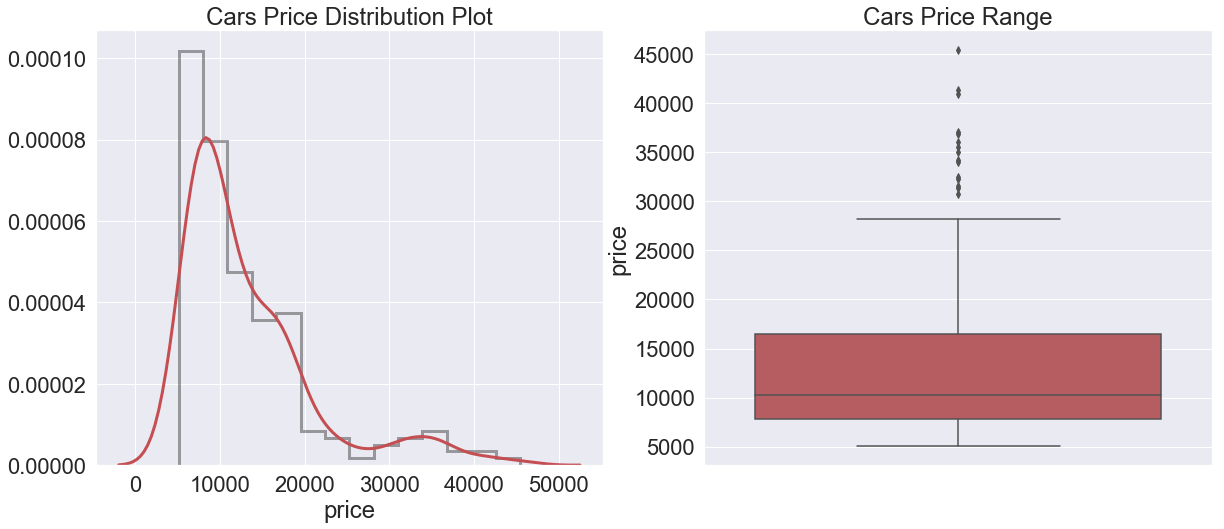

In [9]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Cars Price Distribution Plot')
sns.distplot(cars_final_df.price, hist_kws={"histtype": "step", "linewidth": 3, "color": "k"},
            kde_kws={"color": "r", "lw": 3})

plt.subplot(1,2,2)
plt.title('Cars Price Range')
sns.boxplot(y=cars_final_df.price, color = "r")

plt.show()

From the figure we can conclude below observations:
-  The distribution plot is right-skewed
-  The prices of the cars are mostly below 15000
-  From the `Cars Price Range` graph we can see there are some outliers, for cars with price more than 30000

#### Plotting the categorical variables

[Text(0, 0.5, 'Number of Cars'), Text(0.5, 0, 'Fuel Type')]

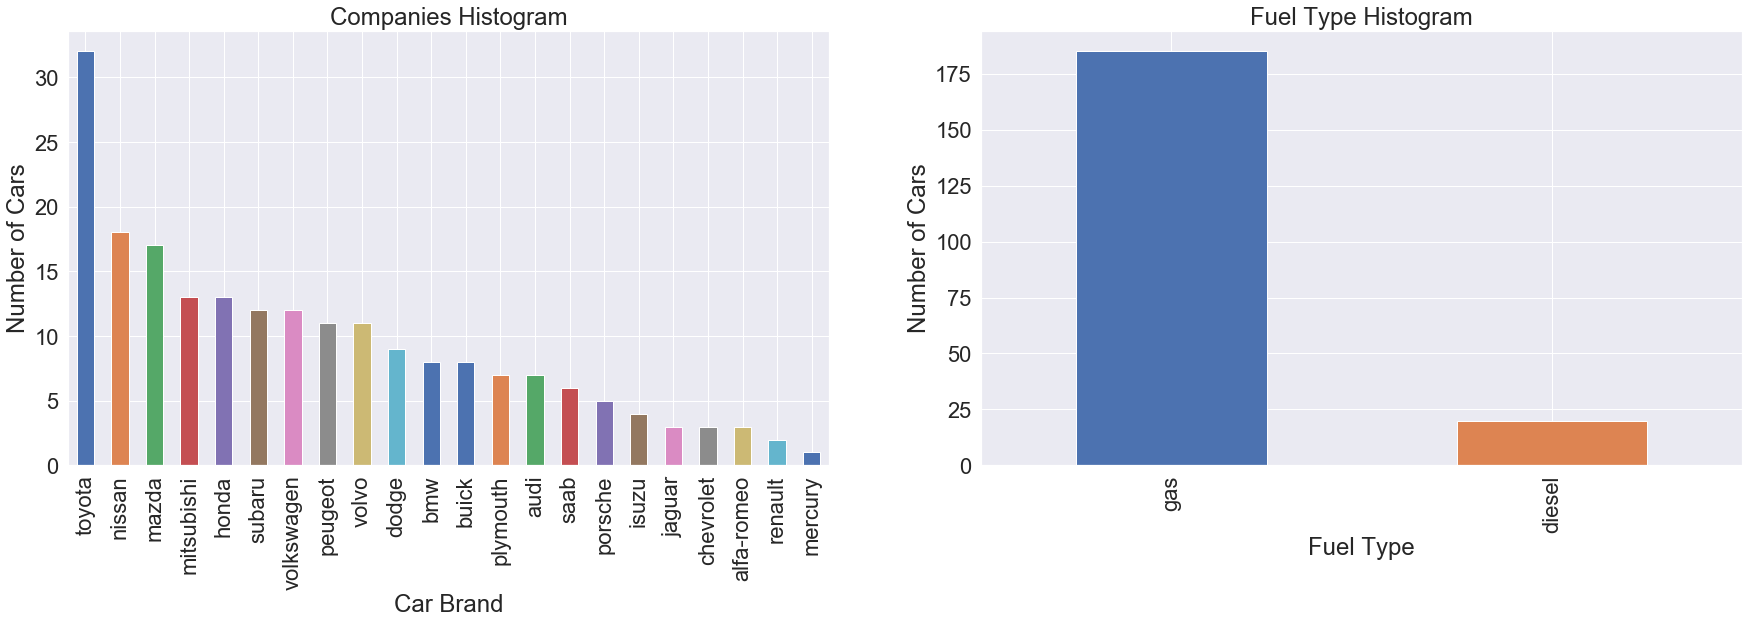

In [10]:
plt.figure(figsize=(30, 8))

plt.subplot(1,2,1)
plt1 = cars_final_df.CarBrand.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car Brand', ylabel='Number of Cars')

plt.subplot(1,2,2)
plt1 = cars_final_df.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Number of Cars')

From the above two graphs we can conclude:
-  `toyota` has the highest number of cars, followed by `nissan` & `mazda`
- The number of `gas` fuel type is more than the `diesel` vehicles

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'Aspiration Type')]

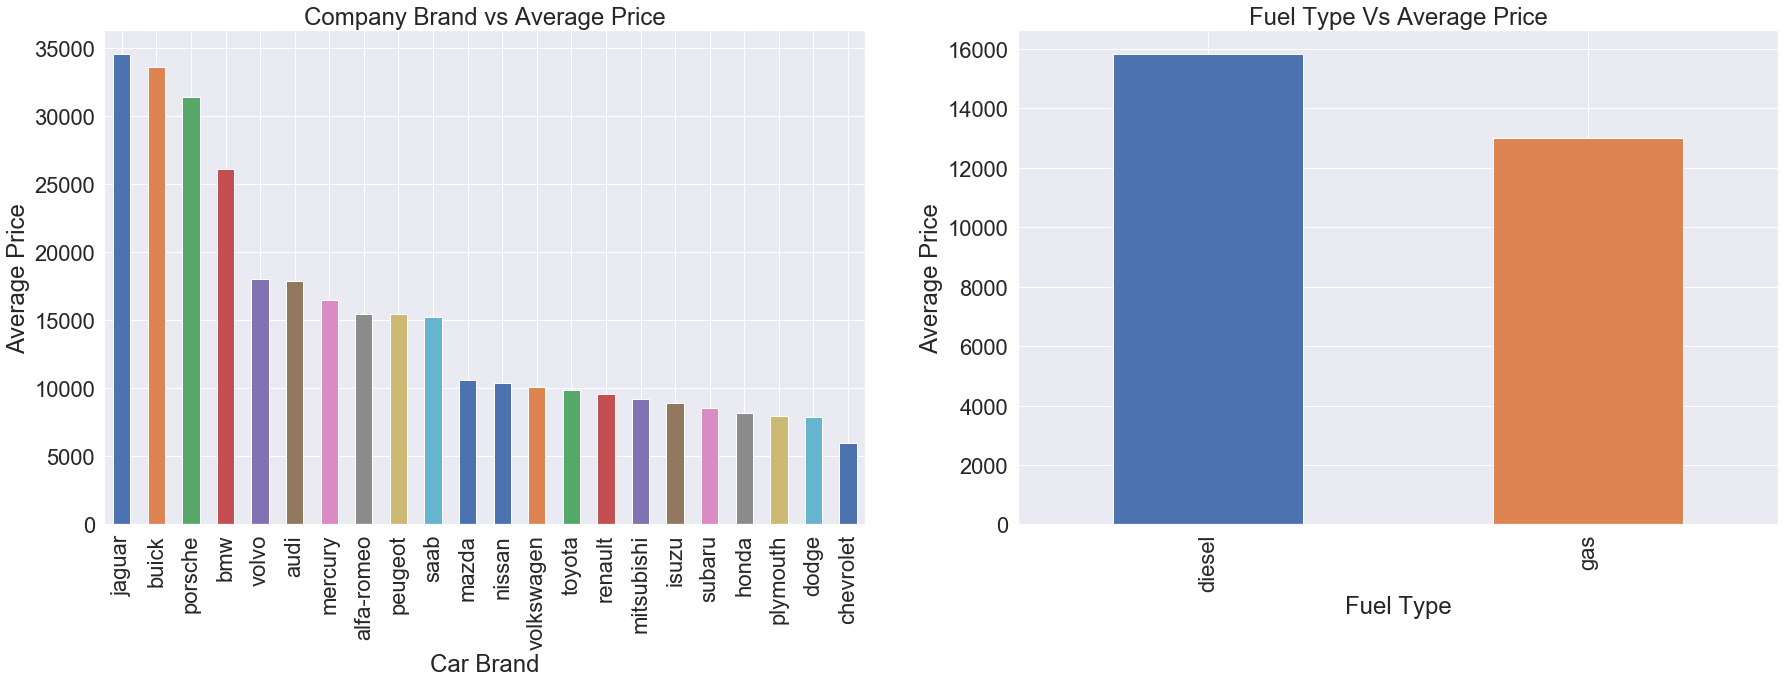

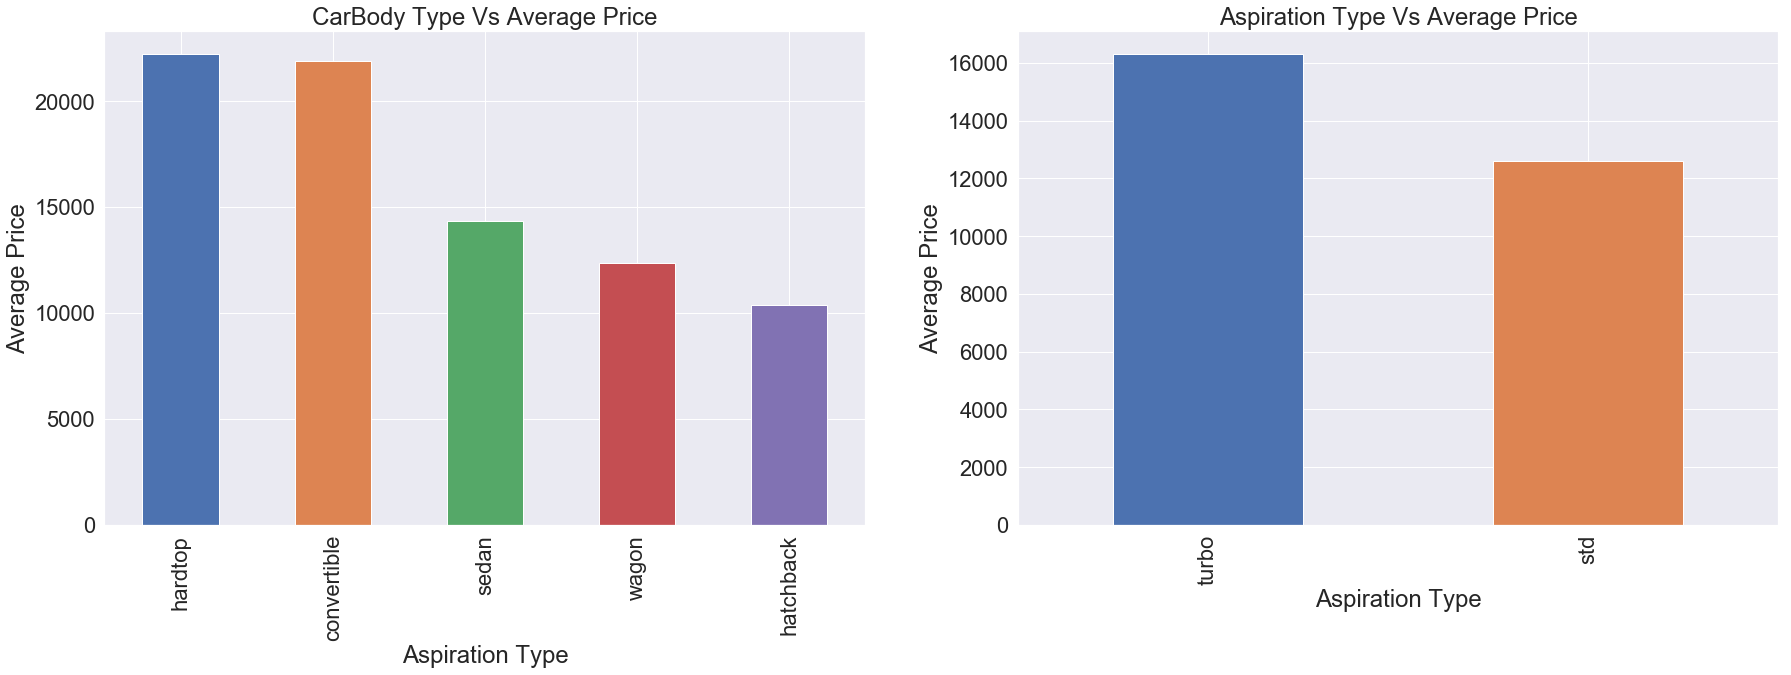

In [11]:
plt.figure(figsize=(30, 20))

plt.figure(1)
plt.subplot(2,2,1)
plt1 = cars_final_df.groupby(['CarBrand'])['price'].mean().sort_values(ascending = False).plot('bar')
plt.title('Company Brand vs Average Price')
plt1.set(xlabel = 'Car Brand', ylabel='Average Price')


plt.subplot(2,2,2)
plt1 = cars_final_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False).plot('bar')
plt.title('Fuel Type Vs Average Price')
plt1.set(xlabel = 'Fuel Type', ylabel='Average Price')

plt.figure(figsize=(30, 20))
plt.figure(2)
plt.subplot(2,2,1)
plt1 = cars_final_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False).plot('bar')
plt.title('CarBody Type Vs Average Price')
plt1.set(xlabel = 'Aspiration Type', ylabel='Average Price')

plt.subplot(2,2,2)
plt1 = cars_final_df.groupby(['aspiration'])['price'].mean().sort_values(ascending = False).plot('bar')
plt.title('Aspiration Type Vs Average Price')
plt1.set(xlabel = 'Aspiration Type', ylabel='Average Price')



From the above two graphs we can conclude:
-  `jaguar` has the highest average price, followed by `buick` & `porsche`
- The cars with fueltype as `diesel` has high average price as compared to `gas` type fuel vehicles
- The cars with body type as `hardtop` has highest average price followed by `convertible` & `sedan`
- The cars with aspiration as `turbo` has high average price as compared to `std` type vehicles

## Deriving new Variables

#### Categorising the cars based on their price

In [12]:
cars_final_df['Price_Category'] = pd.cut(cars_final_df["price"], [0, 10000,20000,50000] ,labels = ["C3", "C2", "C1"])

#### As we had found a linear relationship between the `citympg` & `highwaympg` so with the help of Simple Linear Regression technique we will derive a new variable `Fuel_Economy`

In [13]:
X = cars_final_df['citympg']
y = cars_final_df['highwaympg']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      5.156152
citympg    1.012853
dtype: float64

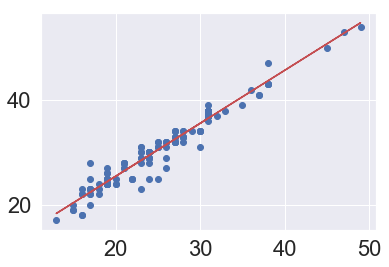

In [14]:
#Plotting the Liner Regression graph between the actual and calculated Y values
plt.scatter(X_train, y_train)
plt.plot(X_train, 5.156152 + 1.012853*X_train, 'r')
plt.show()

In [15]:
def ChangeScale(num):
    num = (1.012853 * num) + 5.156152
    return num

#Caculating the value of citympg in terms of highwaympg
cars_final_df['citympg'] = cars_final_df['citympg'].apply(ChangeScale)

#DEriving the new variables
cars_final_df['Fuel_Economy'] = (cars_final_df['citympg'] + cars_final_df['highwaympg'])/2

#Dropping the columns citympg & highwaympg
cars_final_df = cars_final_df.drop('citympg', 1)
cars_final_df = cars_final_df.drop('highwaympg', 1)

### Plotting a heatmap of correlation of the remaining columns

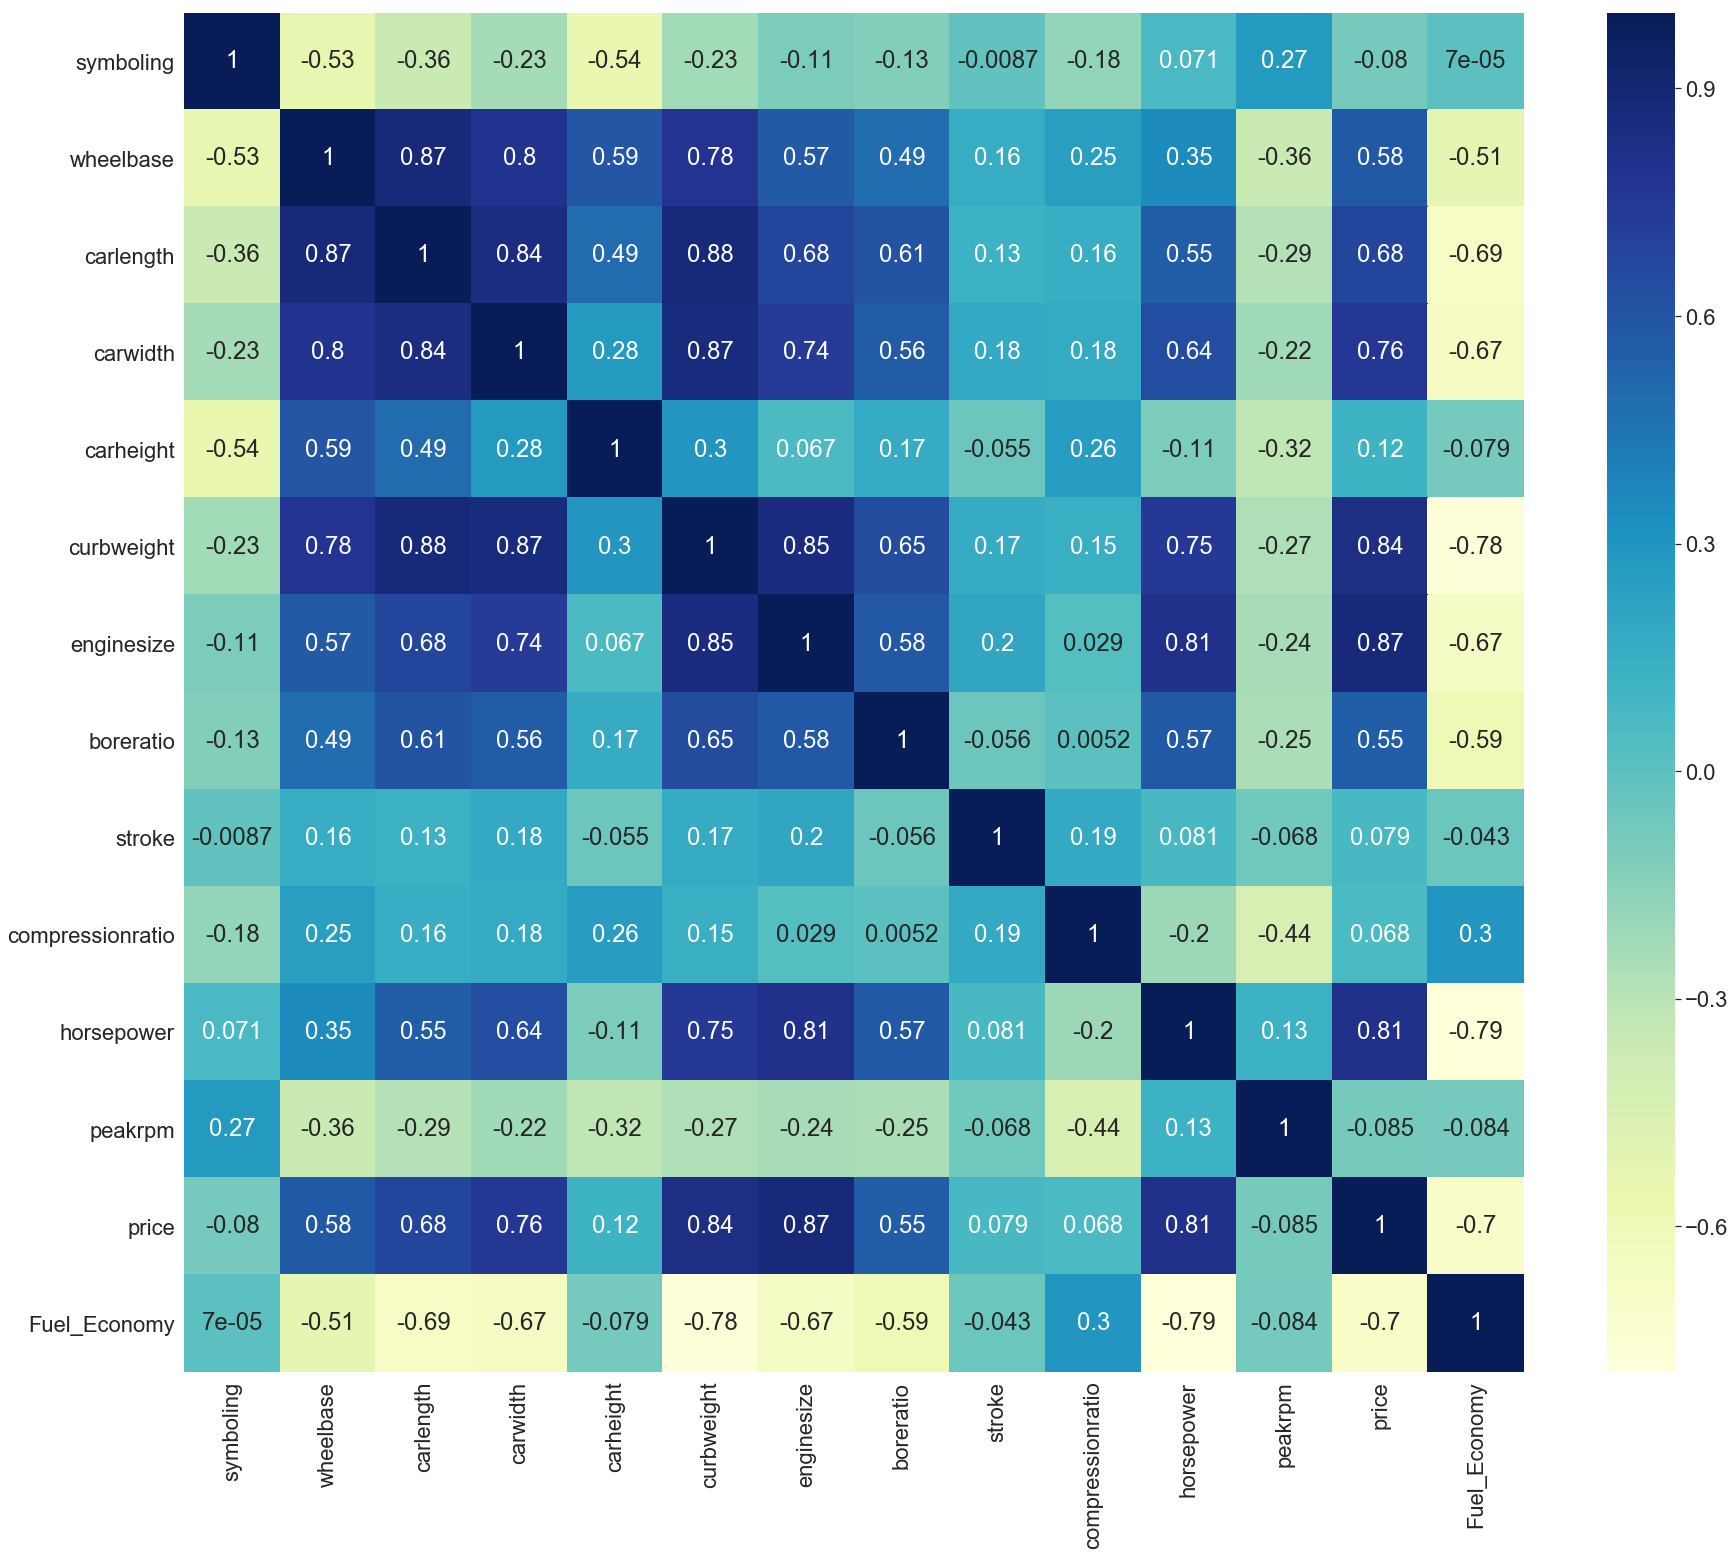

In [16]:
plt.figure(figsize = (30, 25))
sns.heatmap(cars_final_df.corr(), annot = True, cmap="YlGnBu")
sns.set(font_scale=1)
plt.show()

### Based upon the above data analysis and the heatmap generated of the correlation of the remaining variables we can narrow down the columns which are highly correlated with the price of cars and, thus considering only those coulmns for analysis.

In [17]:
high_corr_columns = ['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 
                     'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'Fuel_Economy', 
                     'carlength','carwidth', 'Price_Category']

cars_final_df = cars_final_df[high_corr_columns]
cars_final_df

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,Fuel_Economy,carlength,carwidth,Price_Category
0,13495.000,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,26.713032,168.8,64.1,C2
1,16500.000,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,26.713032,168.8,64.1,C2
2,16500.000,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,25.200179,171.2,65.5,C2
3,13950.000,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,29.732312,176.6,66.2,C2
4,17450.000,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,22.693753,176.6,66.4,C2
5,15250.000,gas,std,sedan,fwd,99.8,2507,ohc,five,136,3.19,110,24.700179,177.3,66.3,C2
6,17710.000,gas,std,sedan,fwd,105.8,2844,ohc,five,136,3.19,110,24.700179,192.7,71.4,C2
7,18920.000,gas,std,wagon,fwd,105.8,2954,ohc,five,136,3.19,110,24.700179,192.7,71.4,C2
8,23875.000,gas,turbo,sedan,fwd,105.8,3086,ohc,five,131,3.13,140,21.187326,192.7,71.4,C1
9,17859.167,gas,turbo,hatchback,4wd,99.5,3053,ohc,five,131,3.13,160,21.680900,178.2,67.9,C2


In [18]:
cars_final_df = pd.get_dummies(cars_final_df)
cars_final_df.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'Fuel_Economy', 'carlength', 'carwidth',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'Price_Category_C3',
       'Price_Category_C2', 'Price_Category_C1'],
      dtype='object')

### Splitting the DataSet into Test & Train datasets

In [19]:
cars_train, cars_test = train_test_split(cars_final_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescailing features for train & test dataset

In [20]:
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'dummy' variables
num_columns = ['wheelbase', 'carlength', 'carwidth','curbweight',  'enginesize', 'boreratio', 'horsepower', 
               'Fuel_Economy' , 'price']

cars_train[num_columns] = scaler.fit_transform(cars_train[num_columns])
cars_test[num_columns] = scaler.fit_transform(cars_test[num_columns])

cars_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel_Economy,carlength,carwidth,fueltype_diesel,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Price_Category_C3,Price_Category_C2,Price_Category_C1
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.534031,0.426016,0.291667,0,...,0,0,1,0,0,0,0,1,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.218847,0.452033,0.666667,0,...,0,0,1,0,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.342583,0.448780,0.308333,0,...,0,0,1,0,0,0,0,1,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.246422,0.450407,0.316667,0,...,0,0,1,0,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.123211,0.775610,0.575000,0,...,0,0,1,0,0,0,0,0,1,0


#### Dividing train dataset in X & Y

In [21]:
y_cars_train = cars_train.pop('price')
x_cars_train = cars_train
x_cars_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel_Economy,carlength,carwidth,fueltype_diesel,fueltype_gas,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Price_Category_C3,Price_Category_C2,Price_Category_C1
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.534031,0.426016,0.291667,0,1,...,0,0,1,0,0,0,0,1,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.218847,0.452033,0.666667,0,1,...,0,0,1,0,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.342583,0.448780,0.308333,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.246422,0.450407,0.316667,0,1,...,0,0,1,0,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.123211,0.775610,0.575000,0,1,...,0,0,1,0,0,0,0,0,1,0


#### Dividing test dataset in X & Y

In [22]:
y_cars_test = cars_test.pop('price')
x_cars_test = cars_test
x_cars_test.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel_Economy,carlength,carwidth,fueltype_diesel,fueltype_gas,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Price_Category_C3,Price_Category_C2,Price_Category_C1
160,0.265306,0.132148,0.082969,0.515873,0.116129,1.000000,0.341732,0.200000,0,1,...,0,0,1,0,0,0,0,1,0,0
186,0.311953,0.219125,0.131004,0.515873,0.212903,0.563514,0.426772,0.315789,0,1,...,0,0,1,0,0,0,0,1,0,0
59,0.355685,0.271985,0.187773,0.674603,0.206452,0.509040,0.522835,0.421053,0,1,...,0,0,1,0,0,0,0,1,0,0
165,0.230321,0.214320,0.082969,0.555556,0.387097,0.454799,0.379528,0.157895,0,1,...,0,0,1,0,0,0,0,1,0,0
140,0.195335,0.202307,0.126638,0.857143,0.135484,0.490960,0.200000,0.136842,0,1,...,0,0,1,0,0,0,0,1,0,0


# Model Building:

## Using RFE technique

In [23]:
lm = LinearRegression()
lm.fit(x_cars_train, y_cars_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_cars_train, y_cars_train)

In [24]:
list(zip(x_cars_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 13),
 ('curbweight', True, 1),
 ('enginesize', False, 7),
 ('boreratio', False, 3),
 ('horsepower', True, 1),
 ('Fuel_Economy', True, 1),
 ('carlength', False, 4),
 ('carwidth', False, 6),
 ('fueltype_diesel', True, 1),
 ('fueltype_gas', False, 15),
 ('aspiration_std', False, 17),
 ('aspiration_turbo', False, 2),
 ('carbody_convertible', False, 5),
 ('carbody_hardtop', False, 23),
 ('carbody_hatchback', False, 24),
 ('carbody_sedan', False, 26),
 ('carbody_wagon', False, 25),
 ('drivewheel_4wd', False, 16),
 ('drivewheel_fwd', False, 21),
 ('drivewheel_rwd', False, 28),
 ('enginetype_dohc', False, 22),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 9),
 ('enginetype_ohc', False, 12),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv', False, 27),
 ('enginetype_rotor', False, 11),
 ('cylindernumber_eight', False, 14),
 ('cylindernumber_five', False, 20),
 ('cylindernumber_four', False, 19),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', Fal

In [25]:
col = x_cars_train.columns[rfe.support_]

In [26]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe_01 = x_cars_train[col]
x_test_rfe_01 = x_cars_test[col]

x_train_rfe_01 = sm.add_constant(x_train_rfe_01)
x_test_rfe_01 = sm.add_constant(x_test_rfe_01)

lm = sm.OLS(y_cars_train,x_train_rfe_01).fit() 

In [27]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.97e-73
Time:                        23:22:32   Log-Likelihood:                 208.61
No. Observations:                 143   AIC:                            -397.2
Df Residuals:                     133   BIC:                            -367.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [28]:
vif = pd.DataFrame()
X = x_train_rfe_01
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Price_Category_C3,inf
9,Price_Category_C2,inf
10,Price_Category_C1,inf
2,horsepower,7.730000
1,curbweight,6.840000
3,Fuel_Economy,5.370000
4,fueltype_diesel,2.230000
6,cylindernumber_six,2.050000
5,enginetype_dohcv,1.960000
7,cylindernumber_twelve,1.550000


In [29]:
# Making predictions
y_train_rfe_pred_01 = lm.predict(x_train_rfe_01)
y_test_rfe_pred_01 = lm.predict(x_test_rfe_01)

In [30]:
print('R2 Score of Train DataSet: ', r2_score(y_cars_train , y_train_rfe_pred_01))
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_01))

R2 Score of Train DataSet:  0.9314728195625225
R2 Score of Test DataSet :  0.7037818070465144


### RFE Model - 02

In [32]:
x_train_rfe_02 = x_train_rfe_01.drop('fueltype_diesel', 1,)
x_test_rfe_02 = x_test_rfe_01.drop('fueltype_diesel', 1,)

lm_02 = sm.OLS(y_cars_train,x_train_rfe_02).fit() 
print(lm_02.summary())
print('\n\n\nPrinting VIF')

vif = pd.DataFrame()
X = x_train_rfe_02
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

y_train_rfe_pred_02 = lm_02.predict(x_train_rfe_02)
y_test_rfe_pred_02 = lm_02.predict(x_test_rfe_02)

print('\n\n\nPrinting R2Score: ')
print('R2 Score of Train DataSet: ', r2_score(y_cars_train , y_train_rfe_pred_02))
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_02))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     226.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.16e-74
Time:                        23:22:52   Log-Likelihood:                 208.26
No. Observations:                 143   AIC:                            -398.5
Df Residuals:                     134   BIC:                            -371.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

### RFE Model - 03

In [33]:
x_train_rfe_03 = x_train_rfe_02.drop('Price_Category_C3', 1,)
x_test_rfe_03 = x_test_rfe_02.drop('Price_Category_C3', 1,)

lm_03 = sm.OLS(y_cars_train,x_train_rfe_03).fit() 
print(lm_03.summary())
print('\n\n\nPrinting VIF')

vif = pd.DataFrame()
X = x_train_rfe_03
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

y_train_rfe_pred_03 = lm_03.predict(x_train_rfe_03)
y_test_rfe_pred_03 = lm_03.predict(x_test_rfe_03)

print('\n\n\nPrinting R2Score: ')
print('R2 Score of Train DataSet: ', r2_score(y_cars_train , y_train_rfe_pred_03))
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_03))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     226.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.16e-74
Time:                        23:22:53   Log-Likelihood:                 208.26
No. Observations:                 143   AIC:                            -398.5
Df Residuals:                     134   BIC:                            -371.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

### RFE Model - 04

In [34]:
x_train_rfe_04 = x_train_rfe_03.drop('cylindernumber_twelve', 1,)
x_test_rfe_04 = x_test_rfe_03.drop('cylindernumber_twelve', 1,)

lm_04 = sm.OLS(y_cars_train,x_train_rfe_04).fit() 
print(lm_04.summary())
print('\n\n\nPrinting VIF')

vif = pd.DataFrame()
X = x_train_rfe_04
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

y_train_rfe_pred_04 = lm_04.predict(x_train_rfe_04)
y_test_rfe_pred_04 = lm_04.predict(x_test_rfe_04)

print('\n\n\nPrinting R2Score: ')
print('R2 Score of Train DataSet: ', r2_score(y_cars_train , y_train_rfe_pred_04))
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_04))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.43e-74
Time:                        23:22:53   Log-Likelihood:                 206.25
No. Observations:                 143   AIC:                            -396.5
Df Residuals:                     135   BIC:                            -372.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1220      0

### RFE Model - 05

In [35]:
x_train_rfe_05 = x_train_rfe_04.drop('cylindernumber_six', 1,)
x_test_rfe_05 = x_test_rfe_04.drop('cylindernumber_six', 1,)

lm_05 = sm.OLS(y_cars_train,x_train_rfe_05).fit() 
print(lm_05.summary())
print('\n\n\nPrinting VIF')

vif = pd.DataFrame()
X = x_train_rfe_05
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

y_train_rfe_pred_05 = lm_05.predict(x_train_rfe_05)
y_test_rfe_pred_05 = lm_05.predict(x_test_rfe_05)

print('\n\n\nPrinting R2Score: ')
print('R2 Score of Train DataSet: ', r2_score(y_cars_train , y_train_rfe_pred_05))
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_05))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     289.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.72e-75
Time:                        23:22:54   Log-Likelihood:                 204.56
No. Observations:                 143   AIC:                            -395.1
Df Residuals:                     136   BIC:                            -374.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1094      0.03

### RFE Model -06

In [36]:
x_train_rfe_06 = x_train_rfe_05.drop('Fuel_Economy', 1,)
x_test_rfe_06 = x_test_rfe_05.drop('Fuel_Economy', 1,)

lm_06 = sm.OLS(y_cars_train,x_train_rfe_06).fit() 
print(lm_06.summary())
print('\n\n\nPrinting VIF')

vif = pd.DataFrame()
X = x_train_rfe_06
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

y_train_rfe_pred_06 = lm_06.predict(x_train_rfe_06)
y_test_rfe_pred_06 = lm_06.predict(x_test_rfe_06)

print('\n\n\nPrinting R2Score: ')
print('R2 Score of Train DataSet: ', r2_score(y_cars_train , y_train_rfe_pred_06))
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_06))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     339.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.61e-75
Time:                        23:22:55   Log-Likelihood:                 202.43
No. Observations:                 143   AIC:                            -392.9
Df Residuals:                     137   BIC:                            -375.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0450      0.01

### RFE Model - 07

In [37]:
x_train_rfe_07 = x_train_rfe_06.drop('enginetype_dohcv', 1,)
x_test_rfe_07 = x_test_rfe_06.drop('enginetype_dohcv', 1,)

lm_07 = sm.OLS(y_cars_train,x_train_rfe_07).fit() 
print(lm_07.summary())
print('\n\n\nPrinting VIF')

vif = pd.DataFrame()
X = x_train_rfe_07
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

y_train_rfe_pred_07 = lm_07.predict(x_train_rfe_07)
y_test_rfe_pred_07 = lm_07.predict(x_test_rfe_07)

print('\n\n\nPrinting R2Score: ')
print('R2 Score of Train DataSet: ', r2_score(y_cars_train , y_train_rfe_pred_07))
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_07))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     415.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.89e-76
Time:                        23:22:56   Log-Likelihood:                 200.61
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     138   BIC:                            -376.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0439      0.01

## Residual Analysis

Text(0.5, 0, 'Errors')

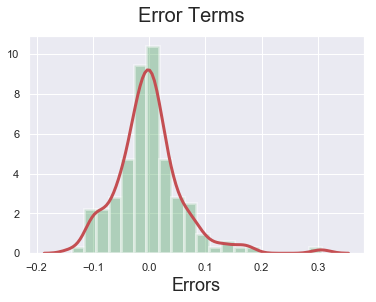

In [38]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_cars_train - y_train_rfe_pred_07), bins = 20, hist_kws={ "linewidth": 3, "color": "g"},
            kde_kws={"color": "r", "lw": 3})

fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

From the above graph we can clearly see that the error terms are normally distributed.

## Model Evaluation

### R2 Score: 

In [39]:
print('R2 Score of Test DataSet : ', r2_score(y_cars_test , y_test_rfe_pred_07))

R2 Score of Test DataSet :  0.882213468230604


Text(0, 0.5, 'Y-Predicted')

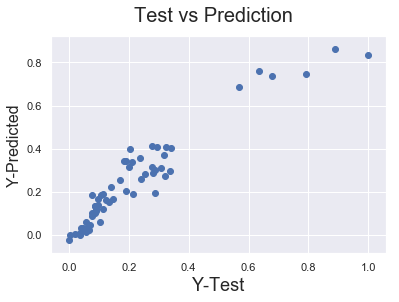

In [40]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_cars_test,y_test_rfe_pred_07)
fig.suptitle('Test vs Prediction', fontsize=20)              # Plot heading 
plt.xlabel('Y-Test', fontsize=18)                          # X-label
plt.ylabel('Y-Predicted', fontsize=16)   

### Printing the final model summary

In [41]:
print(lm_07.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     415.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.89e-76
Time:                        23:23:05   Log-Likelihood:                 200.61
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     138   BIC:                            -376.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0439      0.01